In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

In [3]:
boston = fetch_california_housing()
df = pd.DataFrame(boston.data, columns = boston.feature_names).iloc[:,0:6]
df['target'] = boston.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,0.847


In [ ]:
print(boston.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [15]:
X = df.iloc[:,0:6].values
y = df.iloc[:,-1].values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [17]:
X_train = torch.tensor(X_train).float()
X_test = torch.tensor(X_test).float()
y_train = torch.tensor(y_train).float().unsqueeze(1)
y_test = torch.tensor(y_test).float().unsqueeze(1)   

In [18]:
mean = X_train.mean(dim=0)
std = X_train.std(dim=0)
X_train = (X_train-mean)/std
X_test = (X_test-mean)/std

**Linear Regression Model**

In [24]:
class LinearRegression(nn.Module):
  def __init__(self,input_size,output_size):
    super().__init__()
    self.fc = nn.Linear(6,128,bias = True)  # Define the hidden layer
    self.out = nn.Linear(128,1,bias = True)  # Define the output layer
    self.relu = nn.ReLU()        # Define the activation function

  def forward(self,x):
    x = self.fc(x)
    x = self.relu(x)
    x = self.out(x)
    return x

In [25]:
model = LinearRegression(input_size = X_train.shape[1],output_size=1)
#X_train.shape[1]

In [26]:
criterion = nn.MSELoss()  # nn.L1Loss
optimizer = optim.SGD(model.parameters(),lr = 0.01)

**Training**

In [28]:
losses = []
num_epochs = 10000
for epoch in range(num_epochs):
  #Forward pass
  y_pred = model(X_train)
  loss = criterion(y_pred,y_train)

  #Backward Pass
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


  if (epoch + 1) % 100 == 0:
    print(f'Epoch [{epoch + 1}/10000], Loss: {loss.item(): .4f}')
  losses.append(loss.item())

Epoch [100/100000], Loss:  0.5204
Epoch [200/100000], Loss:  0.5171
Epoch [300/100000], Loss:  0.5141
Epoch [400/100000], Loss:  0.5113
Epoch [500/100000], Loss:  0.5087
Epoch [600/100000], Loss:  0.5063
Epoch [700/100000], Loss:  0.5041
Epoch [800/100000], Loss:  0.5020
Epoch [900/100000], Loss:  0.5000
Epoch [1000/100000], Loss:  0.4981
Epoch [1100/100000], Loss:  0.4963
Epoch [1200/100000], Loss:  0.4946
Epoch [1300/100000], Loss:  0.4929
Epoch [1400/100000], Loss:  0.4913
Epoch [1500/100000], Loss:  0.4898
Epoch [1600/100000], Loss:  0.4883
Epoch [1700/100000], Loss:  0.4869
Epoch [1800/100000], Loss:  0.4855
Epoch [1900/100000], Loss:  0.4842
Epoch [2000/100000], Loss:  0.4829
Epoch [2100/100000], Loss:  0.4816
Epoch [2200/100000], Loss:  0.4803
Epoch [2300/100000], Loss:  0.4791
Epoch [2400/100000], Loss:  0.4779
Epoch [2500/100000], Loss:  0.4768
Epoch [2600/100000], Loss:  0.4756
Epoch [2700/100000], Loss:  0.4745
Epoch [2800/100000], Loss:  0.4735
Epoch [2900/100000], Loss:  0

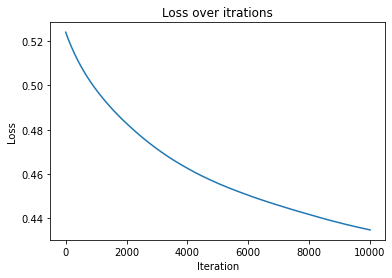

In [29]:
import matplotlib.pyplot as plt
plt.plot(range(10000),losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over itrations')
plt.show()

**Testing**

In [30]:
with torch.no_grad():
  y_test_pred = model(X_test)
  test_loss = criterion(y_test_pred,y_test)
  print(f'Test Loss: {test_loss.item():.4f}')

Test Loss: 0.4624


In [31]:
mae = torch.abs(y_test_pred - y_test).mean()
print('Mean Absolute Error:',mae.item())

Mean Absolute Error: 0.4901909828186035


In [32]:
def mean_absolute_percentage_error(y_true,y_prediction):
  return 100 * torch.mean(torch.abs((y_true-y_prediction) / y_true))

mape = mean_absolute_percentage_error(y_test,y_test_pred)
print(mape)

tensor(29.8272)
